# What is is?

Quarto is a tool for dynamic "report" generation

. . .

This concept has been around for many years!

---

> The traditional way of writing a report as part of a statistical data analysis project uses two separate steps: First, the data are analyzed, and afterwards the results of the analysis (numbers, graphs,. . . ) are used as the basis for a written report. 
>
> Another approach for integration of data analysis and document writing is to embed the analysis itself into the document, which reverses the traditional paradigm
>
> --Leisch, 2002 - Sweave: Dynamic Generation of Statistical Reports Using Literate Data Analysis

## Markup languages


HTML
```html
<h3>Main equations</h3>
<p>MIKE 21 has the following properties</p>
<ul>
    <li><em>Zero</em> numerical mass...</li>
    <li>Second-, to third-order ...</li>
</ul>

```

. . .

$\LaTeX$
```latex
\subsection{Main equations}
MIKE 21 has the following properties
\begin{itemize}
    \item \emph{Zero} numerical mass...
    \item Second-, to third-order ...
\end{itemize}
```

---

Markdown
```markdown
### Main equations

MIKE 21 has the following properties

* *Zero* numerical mass...
* Second-, to third-order ...
```

. . .

### Main equations

MIKE 21 has the following properties

* *Zero* numerical mass...
* Second-, to third-order ...


## Quarto is flexible

```{mermaid}
flowchart LR
    Markdown --> NB[Jupyter Notebook] --> Quarto
    Quarto --> Website
    Quarto --> Presentation
    Quarto --> Report
```
---

::: {.incremental}

**Quarto®** is an open-source scientific publishing system

* Create dynamic content with Python, R, and Julia
* Author documents as markdown or Jupyter notebooks.
* Publish high-quality articles, reports, presentations, websites, blogs, and books in HTML, PDF, MS Word, ePub, and more.
* Author with scientific markdown, including equations, citations, crossrefs, figure panels, callouts, advanced layout, and more.

:::

## Example: Model skill assessment

![](https://raw.githubusercontent.com/DHI/fmskill/main/images/logo/mike-fm-skill-rgb.svg)

In [1]:
import mikeio 
import fmskill
import folium

## Data

The observations will be compared to observed data at the [Euro Platform](https://www.windopzee.net/meet-locaties/europlatform/)

![](https://www.windopzee.net/wp-content/uploads/2019/03/epl2.jpg)

In [2]:
dfs = mikeio.open("data/HKZN_local_2017_DutchCoast.dfsu")
dfs.geometry.boundary_polylines.exteriors[0].xy.shape

locs = [(p[1], p[0]) for p in dfs.geometry.boundary_polylines.exteriors[0].xy]


## Creating a map of the model domain from a dfsu file

*Highlight lines in code*

::: {.callout-warning}
Folium expects lat, lon
:::

```{.python code-line-numbers="4"}
dfs = mikeio.open("data/HKZN_local_2017_DutchCoast.dfsu")
exterior = dfs.geometry.boundary_polylines.exteriors[0]

locs = [(p[1], p[0]) for p in .exterior.xy]

m = folium.Map(location=[52, 3], zoom_start=6)
folium.Polygon(locs, tooltip="Model domain").add_to(m)
folium.Marker(location= [52, 3.28], tooltip="EuroPlatform").add_to(m)

m
```

##

## **The** North sea model

In [3]:
m = folium.Map(location=[52, 3], zoom_start=6, tiles="cartodb positron")
folium.Polygon(locs, fill_color='black', opacity=0.2, tooltip="Model domain").add_to(m)
folium.Marker(location= [52, 3.28], tooltip="EuroPlatform").add_to(m)

m

##

## Show code

`echo: true`

In [4]:
#| echo: True

fn_mod = 'data/ts_storm_4.dfs0'
fn_obs = 'data/eur_Hm0.dfs0'
df_mod = mikeio.read(fn_mod, items=0).to_dataframe()
c = fmskill.compare(fn_obs, df_mod)

## Timeseries

*The presentation format enables the use of interactive plots!*

In [5]:
c.plot_timeseries(backend="plotly");

## Skill

In [6]:
c.skill(metrics=["bias", "rmse","r2", "si"]).style(precision=2)

,n,bias,rmse,r2,si
observation,,,,,
eur_Hm0,67,0.05,0.23,0.93,0.09


::: {.callout-note}
Tables can be customized. [Quarto - Tables](https://quarto.org/docs/authoring/tables.html)
:::

## Scatter plot

In [7]:
c.scatter(backend="plotly")

## Taylor diagram

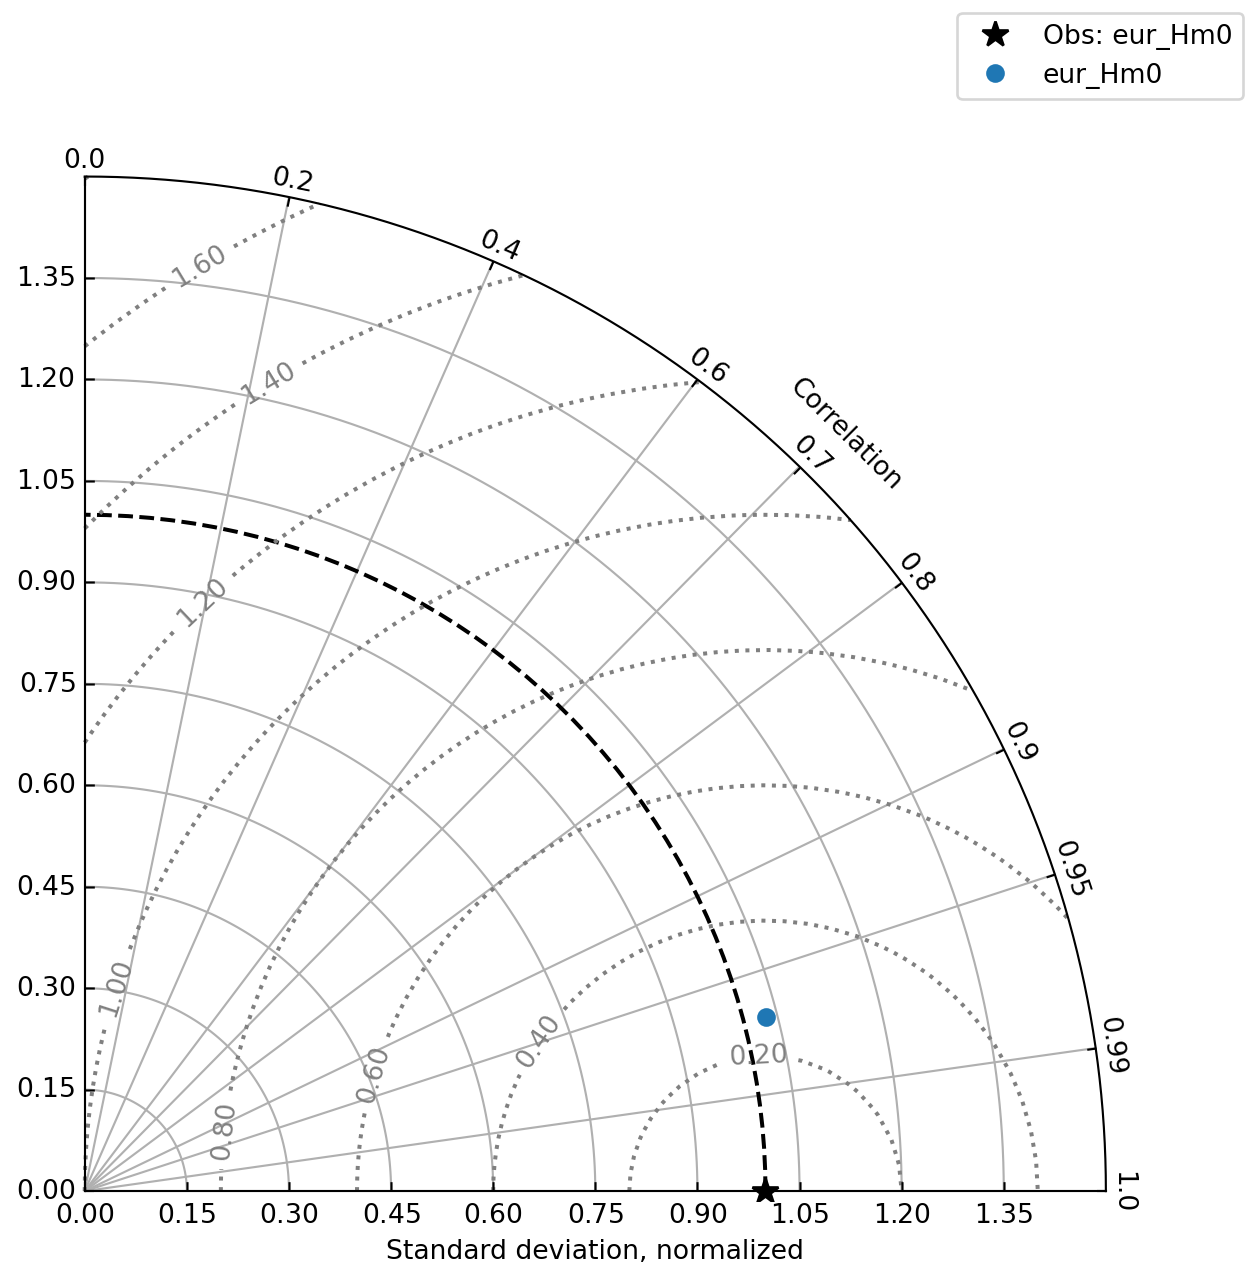

In [8]:
c.taylor(normalize_std=True, title="")

## Mathematical expressions

Scatter index, $SI$, is defined is this way, where $n>0$:

$$ SI = \sqrt {\frac{\sum_{i=1}^n \left( (model_i - \overline {model}) - (obs_i - \overline {obs}) \right)^2}
        {\sum_{i=1}^n obs_i^2}}$$

## Conclusions

* Quarto can create reports, presentations and websites
    - Presentation with Reveal JS can include interactive components (like maps)
* The text is written in markdown
* You can generate output (table, charts) with Python
* Designed for scientific use, equations, citation, footnotes, cross-references, ...
* It is possible to use in combination with a DHI styled Word or PowerPoint template
* For automated report generation, output can be varied by the use of variables, e.g. same style but, different model, station, simple/advanced, ...